<a href="https://colab.research.google.com/github/NatalijaGajic/pppo_classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from IPython.display import clear_output
def clear():
  for i in range(10):
    clear_output(wait=True)
    print()

from IPython.display import Image, display

## Sadržaj

1. Uvod
2. Terminologija
3. Opis podataka
4. Metodologija treniranja
5. Obučavanje klasifikacionih modela
5. Zaključak
6. Literatura



###**Uvod**

Klasifikacija fotografija predstavlja nadgledani zadatak mašinskog učenja dodeljivanja (najverovatnije) oznake ulaznoj fotografiji iz fiksnog skupa oznaka (kategorija). Odnosi se na postupak dodeljivanja oznake (odnosno klase) fotografiji na osnovu njenog vizuelnog sadržaja.

Postoje četiri osnovne vrste klasifikacije:


*   **Binary classification**- zadaci klasifikacije u kojima postoje dve moguće klase
*   **Multi-class classification** - zadaci klasifikacije u kojima postoji više mogućih klasa od kojih se jedna dodeljuje instanci
*   **Multi-label classification** - zadaci klasifikacije u kojima postoji dve ili više klasa od kojih jedna ili više njih mogu da budu dodeljeni instanci
*   **Imbalanced classificaton** - odnosi se na klasifikacione zadatke nad setom podataka u kom je broj instanci različitih klasa neravnomerno raspoređen

Zadatak predstavlja klasifikacija biljaka na osnovu slike njenog lista. Svaka instanca pripada jednoj od 99 mogućih klasa, pa je u pitanju multi-class klasifikacija. 

Prethodna istraživanja dovela su do razvoja različitih metoda analize listova.  Botaničari koriste različite karakteristike listova u morfološkim i taksonomskim istraživanjima. 
Generalno se smatra da je najkorisnije karakteristike za prepoznavanje biljaka dvodimenzionalni oblik obrisa njihovih listova ili latica, kao i mreža vena lista i karakteristike margina lista. Automatski sistemi za klasifikaciju biljaka samim tim koriste tehnike obrade slike koje se baziraju na ovim karakteristikama. 
Istraživači u ovoj oblasti smatraju da obris oblika lista najefektivnije omogućava prepoznavanje biljke, budući da većina biljaka ima karakterističan oblik lista [1].







###**Terminologija** 

*Taksonomija* - nauka koja proučava principe, metode i svrhe klasifikacije. U biologiji se odnosi na uređenu i hijerarhijsku klasifikaciju živih bića.

*Margina* - granična površina lista listova. Margine mogu biti glatke, zglobljene (nazubljene), lobanje ili razdvojene.

*Vene* - vaskularni tkivni paketi koji podržavaju list i transportne hranljive materije.

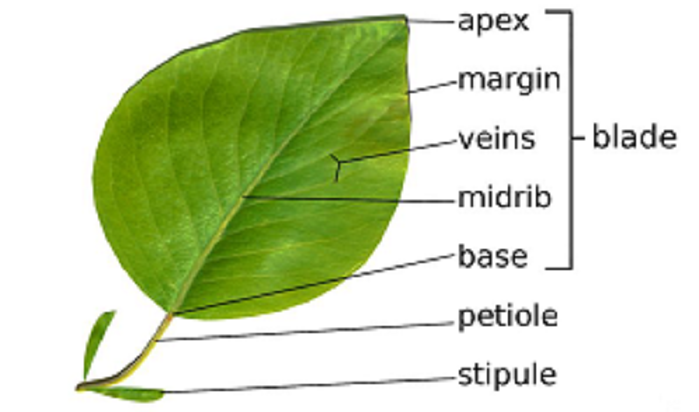

In [85]:
display(Image('slike/list_terminologija.png'))

###**Opis podataka**

Set podataka sadrži 1584 slika biljaka (16 za svaku od 99 klasa (vrste biljaka)). Ove slike su binarne, sa belom pozadinom i crnim listom, različite rezolucije. Svaka od slika dodatno je objašnjena skupom feature-a [2]:


*  deskriptor oblika,
*  histogram teksure i
*  histogram margine.

Za svaki od ovih feature-a dat je vektor od 64 atributa za svaki od primeraka u skupu podataka.







Preuzimanje dataset-a i csv fajlova:

In [86]:
#https://drive.google.com/file/d/1Iaq6NNiR8CH4jruMs4wQoh-ZV5Nndm1f/view?usp=sharing
#https://drive.google.com/file/d/1q7Fy4SVLLODGQxzpZa3ZMOr0kBgKSRRh/view?usp=sharing
#https://drive.google.com/file/d/1ZyQ7jkw91kLyI8gnm_I9Cnlrm1qlQJPI/view?usp=sharing
#https://drive.google.com/file/d/1Egb1USY9s04hShkSHxTsRdtrFRTJK29f/view?usp=sharing
!gdown --id "1Iaq6NNiR8CH4jruMs4wQoh-ZV5Nndm1f"
!gdown --id "1q7Fy4SVLLODGQxzpZa3ZMOr0kBgKSRRh"
!gdown --id "1ZyQ7jkw91kLyI8gnm_I9Cnlrm1qlQJPI"
!gdown --id "1Egb1USY9s04hShkSHxTsRdtrFRTJK29f"
!unzip slike.zip
!unzip images.zip
clear()

In [130]:
#importing mpl models
#https://drive.google.com/file/d/1_8y7wa-HkOO5HR_qlcfk_X4G76TrcvEs/view?usp=sharing
!gdown --id "1_8y7wa-HkOO5HR_qlcfk_X4G76TrcvEs"
!unzip nn_models.zip

Downloading...
From: https://drive.google.com/uc?id=1_8y7wa-HkOO5HR_qlcfk_X4G76TrcvEs
To: /content/nn_models.zip
43.9MB [00:02, 20.2MB/s]
Archive:  nn_models.zip
   creating: nn_models/
  inflating: nn_models/nn_model.hdf5  
  inflating: nn_models/nn_modelv2.hdf5  
  inflating: nn_models/nn_modelv3.hdf5  


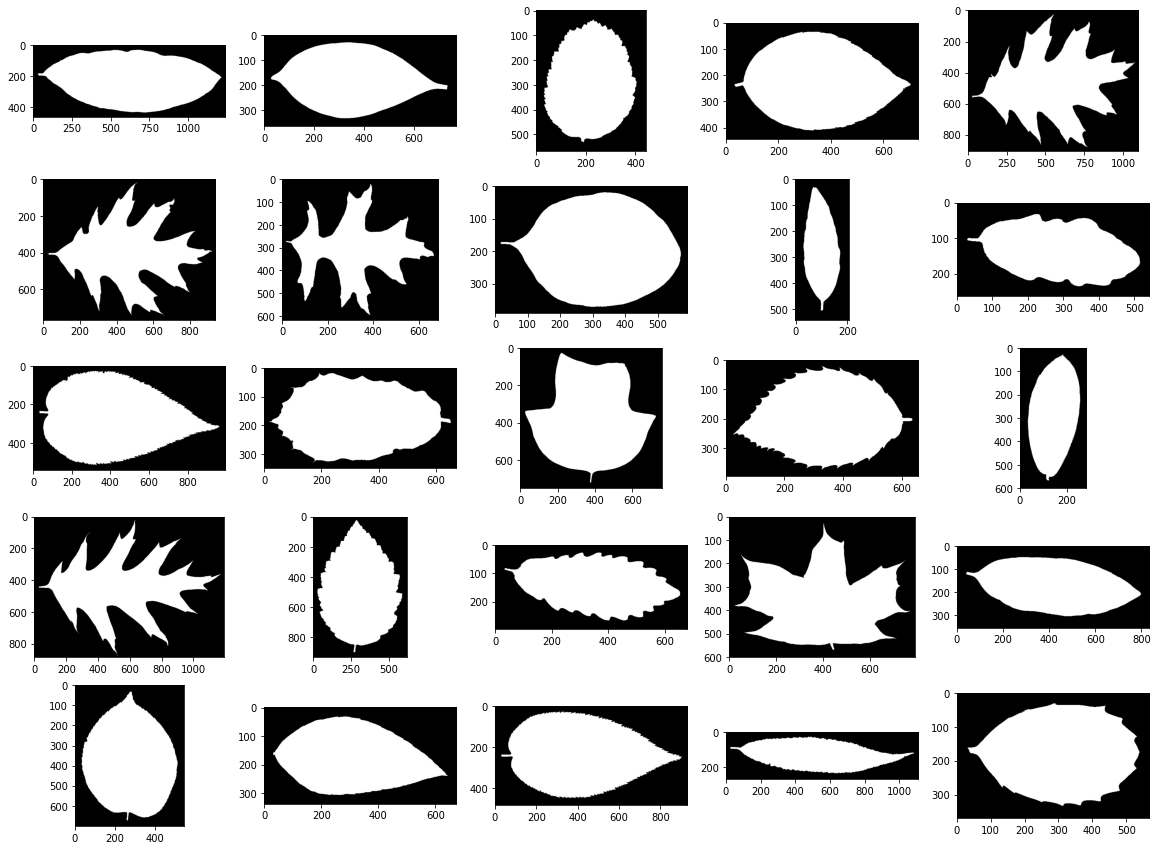

In [87]:
import matplotlib.pyplot as plt
from random import randrange
plt.figure(figsize=(20,15))
from keras.preprocessing.image import load_img
for i in range(25):
    image_number=randrange(1584)
    plt.subplot(5,5,i+1)
    img=load_img("/content/images/" + str(image_number)+'.jpg')
    plt.imshow(img)

Fajl train.csv sadrži 990 zapisa labeliranih slika koje će se koristiti za treniranje klasifikacionog modela.

Polja fajla:

id - jedinstveni identifikator slike

species - ime klase (vrste biljke) kojoj pripada instanca reprezentovana unosom sa odgovarajućim id-em

margin_1, margin_2, margin_3, ..., margin_64 - svaki od 64 atributa vektora za feature margine
shape_1, shape_2, shape_3, ..., shape_64 - svaki od 64 atributa vektora za feature oblika lista

texture_1, texture_2, texture_3, ..., texture_64 - svaki od 64 atributa vektora za feature teksture 

In [88]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv', index_col=False)
df_test = pd.read_csv('/content/test.csv', index_col=False)
print(df_test.head())
print(df_test.describe())

   id   margin1   margin2   margin3  ...  texture61  texture62  texture63  texture64
0   4  0.019531  0.009766  0.078125  ...        0.0   0.000000   0.003906   0.053711
1   7  0.007812  0.005859  0.064453  ...        0.0   0.000977   0.037109   0.044922
2   9  0.000000  0.000000  0.001953  ...        0.0   0.015625   0.000000   0.000000
3  12  0.000000  0.000000  0.009766  ...        0.0   0.089844   0.000000   0.008789
4  13  0.001953  0.000000  0.015625  ...        0.0   0.007812   0.009766   0.007812

[5 rows x 193 columns]
                id     margin1     margin2  ...   texture62   texture63   texture64
count   594.000000  594.000000  594.000000  ...  594.000000  594.000000  594.000000
mean    780.673401    0.017562    0.028425  ...    0.019975    0.009389    0.020970
std     465.646977    0.019585    0.038351  ...    0.034704    0.013457    0.023407
min       4.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     368.500000    0.001953    0.001953  ..

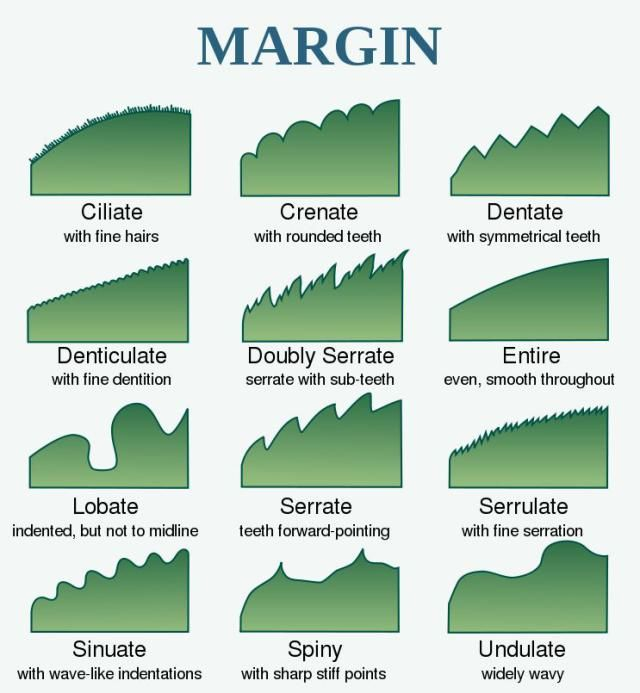

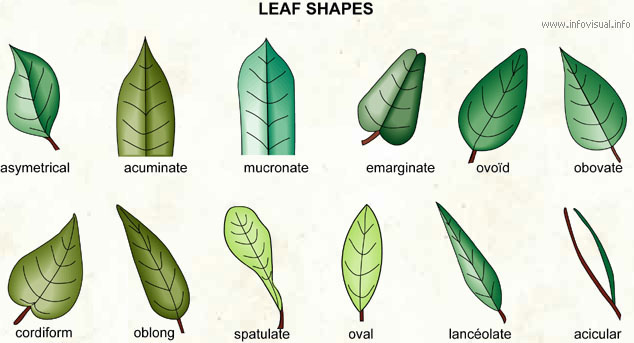

In [89]:
display(Image('slike/margin.jpg'))
display(Image('slike/shape.jpg'))

In [90]:
print(df_train["species"].value_counts())
print(df_train.isnull().sum())

Alnus_Maximowiczii        10
Populus_Nigra             10
Quercus_Phillyraeoides    10
Quercus_Chrysolepis       10
Quercus_Ilex              10
                          ..
Phildelphus               10
Sorbus_Aria               10
Prunus_Avium              10
Cornus_Controversa        10
Tilia_Tomentosa           10
Name: species, Length: 99, dtype: int64
id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


####**Mogući pristupi**

Za treniranje modela mogu se koristiti ekstraktovani feature-i, slike ili kombinacija ovih podataka.

Pored već ekstraktovanih feature-a, mogu se ekstraktovati dodatni feature-i, koji mogu ručno biti ekstraktovani ili uz pomoć postojećih definisanih algoritama, pri čemu treba razmatrati algoritme koje ima smisla primenjivati na binarnim slikama:


*   HuMoments - kvantifikuju oblik objekta na slici,
*   Odnos crnih i belih piksela,
*   Rezolucija slike,
*   Odnos širine i visine,
*   Da li je orijentacija horizontalna (širina > visina).

Ulazni podaci modela mogu biti i same slike. U slučaju klasifikacije koja kao ulazne podatke prima slike koriste se modeli dubokog učenja, tačnije konvolucione neuronske mreže. Konvolucione neuronske mreže u svojoj arhitekturi sadrže konvolucione slojeve koji se ponašaju kao feature ekstraktori. Neuronske mreže koje poseduju u svojoj arhitekturi fully connected slojeve zahtevaju fiksnu veličinu slike, pa budući da su slike iz dataset-a varijabilne veličine, rad sa ovim arhitekturama bi podrazumevao tehnike pretprocesuiranja slika kojim se slike podešavaju na fiksnu rezoluciju koja odgovara onoj koju model očekuje na ulazu. Drugi pristup bi predstavljao korišćenje fully convolutional arhitektura, koje dozvoljavaju varijabilnu veličinu slike na ulazu.

U slučaju modela dubokog učenja, zbog prirode procesa obučavanja ovih modela potrebno je razmotriti količinu podataka na kojoj bi se model obučavao.
Previše kompleksne modele je teško obučiti ili se može pojaviti overfitting. Kako bi se uvećao skup podataka sa kojima ovi modeli rade moguće je primeniti tehnike augmentacije podataka. Ovim tehnikama iz početnog skupa podataka mogu se dobiti slike listova skalirane veličine i izmenjene orijentacije.

Zbog činjenice da ekstraktovani feaure-i predstavljaju najkorisnije karakteristike za prepoznavanje biljaka[], nije vršena dodatna ekstrakcija ni obučavanje konvolucionih mreža, već su modeli obučavani na ovim karakteristikama.




####**Pretprocesuiranje podataka**

U dataset-u ne postoje nedostajuće vrednosti, ni disbalans klasa koji bi uticao na procenu tačnosti modela.

Svi feature-i predstavljaju numeričke atribute, pa je potrebno kodirati samo vrednosti labele iz kategoričke u numeričku, uz pomoć LabelEncoder-a.

In [91]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder=LabelEncoder()
le=encoder.fit(df_train.species)
labels=le.transform(df_train.species)
labels_copy = labels.copy()
classes=list(le.classes_)
print(classes)
uniquelables=np.unique(labels)
print(uniquelables)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [92]:
df_train=df_train.drop(['id','species'],axis=1)
test_id=df_test.id
df_test=df_test.drop(['id'],axis=1)
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB
None


Izvršeno je skaliranje feature-a podataka. Skaliranje podataka prestavlja standardizaciju podataka, odnosno postupak kojim se podaci normalizuju u određenom opsegu. Ovaj postupak može ubrzati učenje u slučaju primene algoritma stohastičkog gradijentnog supsta, a neophodan je korak u algoritmima koje računaju distancu između tačaka dataset-a. Prilikom računanja distance, feature-i većeg opsega će imati veći uticaj na kalkulaciju distance, iako razlika u vrednostima drugog feature-a manjeg opsega može biti značajnija u okviru posmatranog opsega. 

Određeni algoritmi (Naive Bayes, Linear Discriminant Analysis) su dizajnirani da reše problem različitih opsega dajući težine karakteristikama u skladu sa njihovim opsegom.

In [93]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(df_train)
sc.fit_transform(df_test)
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

###**Metodologija treniranja**

##### **Unakrsna validacija**
Algoritmi klasifikacije se treniraju korišćenjem
primera iz trening skupa, a zatim se performanse klasifikatora mere nad slikama iz test
skupa koje nisu korišćene prilikom treniranja klasifikatora.
Za određivanje performanse upotrebljenog modela, koristi se trening skup podataka, nad kojim se primenjuje tehnika pod nazivom unakrsna validacija
(engl. cross validation). Ova tehnika podrazumeva da se trening skup podataka podeli na 𝑘
delova približno iste veličine, a zatim se 𝑘 − 1 delova koristi kao skup za učenje a
preostali deo kao skup za validaciju. Postupak se ponavlja 𝑘 puta tako da svaki od delova po
jednom učestvuje u ulozi validacionog skupa.

##### **Stratifikacija**
Zbog velikog broja klasa, a malog broja primeraka u okviru svake od klasa, kako bi se obezbedila distribucija klasa prilikom postupka unakrsne validacije približna onoj u trening setu podataka, potrebno je izvršiti stratifikaciju. 
Postupak podele na 𝑘 delova
potrebno je modifikovati tako da se osigura podjednaka zastupljenost klasa u svakom od 𝑘 delova. Ovakav
postupak se naziva stratifikacija i njime bi trebalo obezbediti da zastupljenost klasa bude
približno jednaka zastupljenosti u inicijalnom skupu primera [3]. U praksi se najčešće uzima 𝑘 =
5 ili 𝑘 = 10. Zbog male veličine dataseta-a za parametar 𝑘 izabrana je vrednost 5.

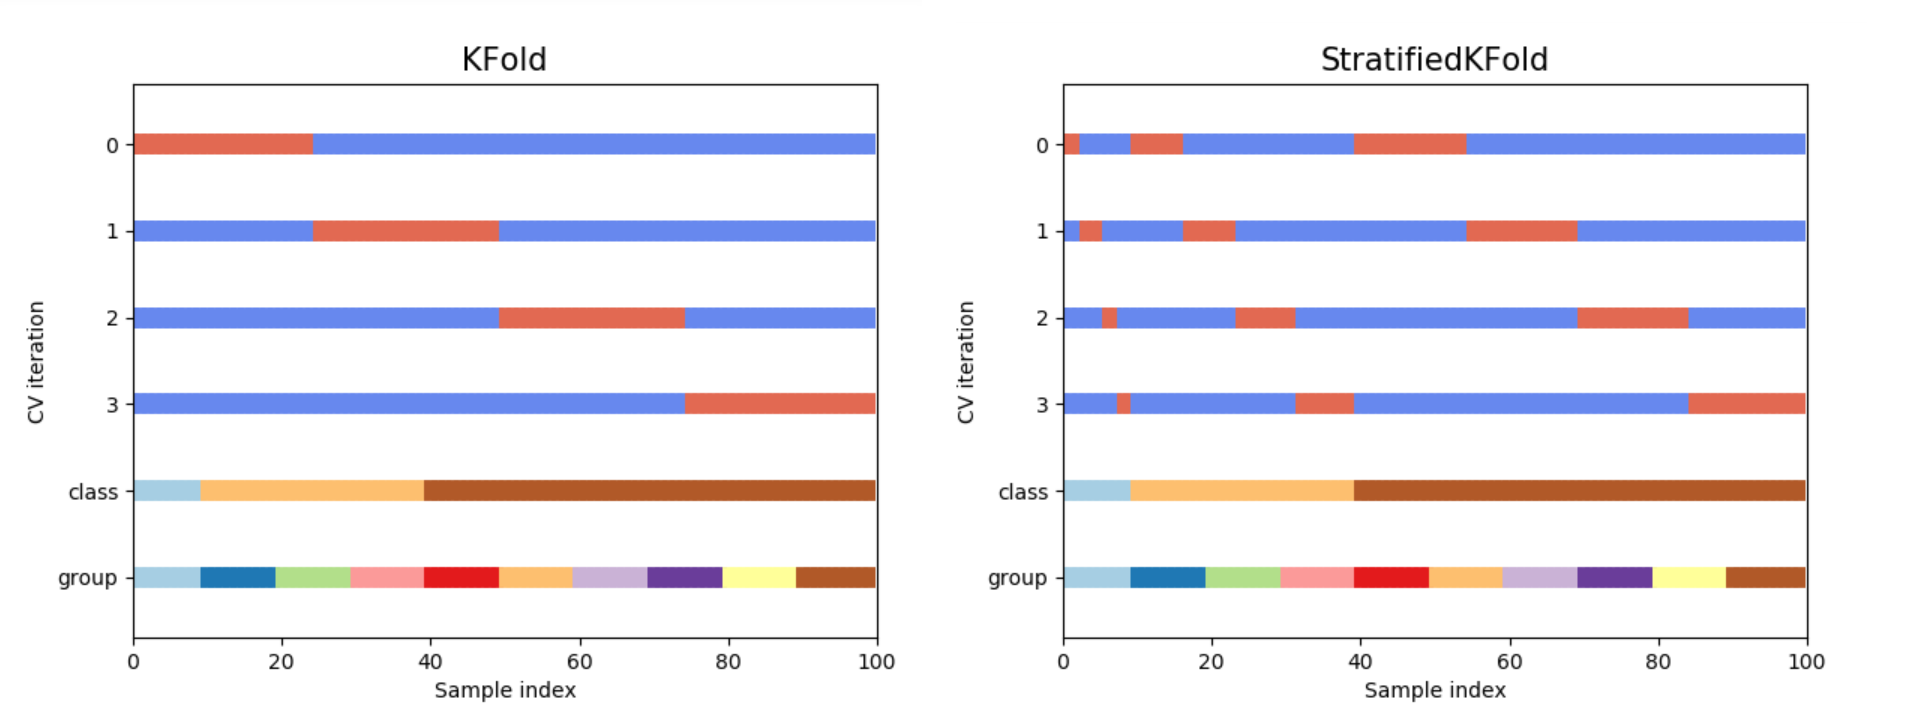

In [95]:
display(Image('slike/stratified_kfold.png'))

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def stratified_k_fold(classifier, df_train):
  skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=4)
  df_labels = pd.DataFrame(labels)
  splits = skf.split(df_train, df_labels)
  scores = np.array([])
  for n,(train_index, test_index) in enumerate(splits):
    X_train, X_test = df_train.iloc[train_index,:], df_train.iloc[test_index,:]
    y_train, y_test = df_labels.iloc[train_index,:], df_labels.iloc[test_index,:]
    y_test = np.ravel(y_test)
    y_train = np.ravel(y_train)
    scores = np.append(scores, np.array([classifier.fit(X_train, y_train).score(X_test, y_test).mean()]), axis=None)
    # print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
    #         f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
    #         f'{df_train.iloc[test_index,5].value_counts() / len(df_train.iloc[test_index,5])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
    #         f'{df_train.iloc[train_index,5].value_counts() / len(df_train.iloc[train_index,5])}\n\n')
  return scores


###**Obučavanje klasifikacionih modela**

#####**Vrste klasifikatora**
Za zadatak klasifikacije razvijeno je šest modela:

*   **SGD Classifier (Stochastic Gradient Descent)**
*   **Random Forest Classifier**
*   **KNeighbors Classifier**
*   **SVM Classifier (Support Vector Machine)**
*   **Naive Bayes Classifier**
*   **MLP (Multilayer Perceptron)**





#####**Uspešnost klasifikacije**
Kao standardna mera uspešnosti klasifikacije, korišćena je tačnost klasifikacije (engl.
classification accuracy). Tačnost klasifikacije se definiše kao broj tačno klasifikovanih slika u
odnosu na ukupan broj slika u test skupu, izražen u procentima:

𝐴𝐶𝐶 =
𝑏𝑟𝑜𝑗 𝑡𝑎č𝑛𝑜 𝑘𝑙𝑎𝑠𝑖𝑓𝑖𝑘𝑜𝑣𝑎𝑛𝑖ℎ 𝑠𝑙𝑖𝑘𝑎/𝑢𝑘𝑢𝑝𝑎𝑛 𝑏𝑟𝑜𝑗 𝑠𝑙𝑖𝑘𝑎 𝑡𝑒𝑠𝑡 𝑠𝑘𝑢𝑝𝑎 × 100%

#####**Bias-variance tradeoff**

Bias - razlika između prosečne predikcije modela i vrednosti koju pokušava da predvidi; greška koja se javlja prilikom predikcije.

Variance - varijabilnost predikcije; greška koja nastaje zbog prevelike osetljivosti na male fluktuacije u trening skupu.

Visok bias označava da model nije naučio bitne povezanosti karakteristike podataka i vrednosti koje se predviđaju, odnosno model underfit-uje.

Visoka varijansa rezultat je učenja modela na šumu, odnosno model loše generalizuje i klasifikuje podatke koje variraju po vrednostima u odnosu na podatke iz trening skupa, odnosno model overfit-uje.

Tehnika unakrsne validacije sa k fold-ova za svaki od fold-ova izračunava tačnost klasifikacije, pa se tačnost klasifikacije modela računa kao prosečna tačnost u k fold-ova. Pored prosečne vrednosti, na osnovu skupa od k vrednosti tačnosti klasifikacije moguće je izračunati standardnu devijaciju ovog skupa vrednosti. Standarna devijacija ukazuje na varijansu modela, dok tačnost ukazuje na visok ili nizak bias.

Problem bias-variance tradeoff-a odnosi se na pokušaje da se istovremeno minimizuju obe vrste greške koje onemogućavaju da model generalizuje. Odnosno, potrebno je pronaći dobar balans između bias-a i varijanse tako da se minimizuje ukupna greška modela [4].

*Total Error* = *Bias*^2 + *Variance* + *Irreducible Error*


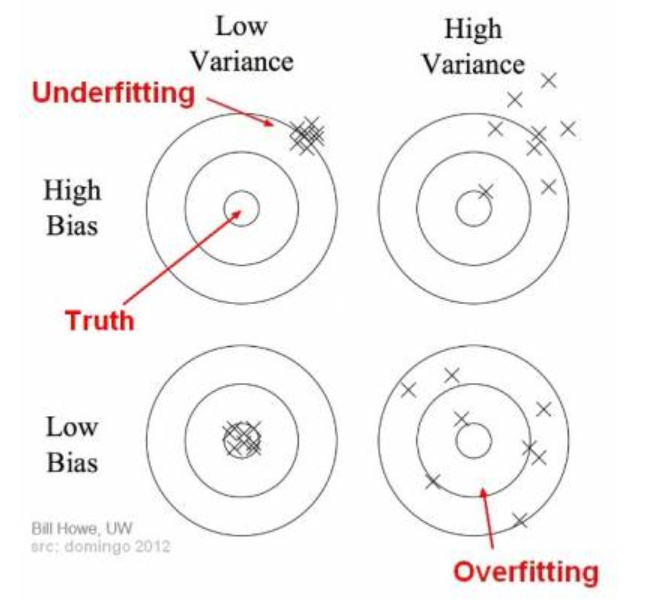

In [97]:
display(Image('slike/bias_variance_tradeoff.png'))

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

def train_model(classifier, X_train, X_test, y_train, y_test):
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print(accuracy)
  #print(cm)
  #print(classification_report(y_test, grid_predictions))
  return accuracy

####**SGD Classifier**

SGD predstavlja linearni klasifikator (Support Vector Machine, Logistička regresija) koji koristi stohastički gradijentni spust prilikom treniranja. Prilikom treniranja računa se gradijent funkcije gubitka i model ažurira promenom parametara modela kako bi se ova funkcija minimizovala. 

#####**Stohastic Gradient Descent** 

Stohastički gradijentni spust je iterativna metoda za optimizaciju funkcije greške (loss/cost function). Predstavlja stohastičku aproksimaciju gradijentnog spusta, jer gradijent nije izračunat nad celim skupom podataka, već na delu. 


In [99]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier()
#0.6121212121212122
scores = stratified_k_fold(classifier, df_train)
print(scores)
sgd_acc = np.mean(scores, dtype=np.float64)
sgd_std = np.std(scores, dtype=np.float64)
print(sgd_acc)
print(sgd_std)


[0.71212121 0.52020202 0.64646465 0.67171717 0.60606061]
0.6313131313131313
0.06538404982901923


####**Random Forest Classifier**

Random Forest, odnosno nasumična suma, je algoritam nadgledanog učenja koji gradi ansambl stabla odlučivanja. Stablo odlučivanja je model koji se gradi u obliku stabla koje se sastoji iz listova i grana, pri čemu svaka grana vodi do čvora u kom će se naći instance skupa podataka koje zadovoljavaju uslov vrednosti obeležja instance koji je definisan za datu granu. Svaki list ovog stabla nosi vrednost jedne od klasa, tako da se prolazeći kroz stablo proveravaju vrednosti atributa instance sve dok se instanca ne nađe u listu koji joj dodeljuje jednu od klasa [5].

Random Forest algoritam klasifikuje instancu sprovodeći je kroz svako od stabala odluke i zatim se instanci dodeljuje klasa koja je bila izglasana najviše puta.

RandomForestClassifier biblioteke sklearn prima parametar n_estimators koji određuje broj stabala odluke. Parametar criterion određuje meru kvaliteta koja se koristi za donošenje odluke o podeli čvora i koristi prilikom gradnje stabala. Default-na vrednost broja stabala odluke je 100, kriterijum podele je Gini. 




In [100]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
#0.9787878787878788
scores = stratified_k_fold(classifier, df_train)
print(scores)
rndf_acc = np.mean(scores, dtype=np.float64)
rndf_std = np.std(scores, dtype=np.float64)
print(rndf_acc)
print(rndf_std)

[0.96969697 0.95454545 0.97979798 0.96969697 0.97979798]
0.9707070707070707
0.009257728676678442


#### **KNeighbours Classificator**

Algoritam k najbližih suseda klasifikuje instancu posmatrajući k njoj najbližih suseda, tako što joj dodeljuje klasu kojoj pripada najveći broj njenih suseda. 

Za klasifikator biblioteke sklearn defaultna vrednost broja suseda koji se razmatraju je 5.


In [101]:
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier()
#0.8585858585858585
scores = stratified_k_fold(classifier, df_train)
print(scores)
knn_acc = np.mean(scores, dtype=np.float64)
knn_std = np.std(scores, dtype=np.float64)
print(knn_acc)
print(knn_std)


[0.85353535 0.83333333 0.87373737 0.88888889 0.84343434]
0.8585858585858585
0.020202020202020176


####**SVM**

Cilj ovog algoritma je pronaći hyperplane u N-dimenzionalnom prostoru koji na najbolji način razdvaja instance različitih klasa.

Support vector-i su tačke koje su najbliže hyperplane-u i utiču na njegovu orijentaciju. Koristeći ove vektore, maksimizuje se margina klasifikatora, odnosno postiže se najbolje razdvajanje klasa u prostoru. 

SVM je izvorno binarni klasifikator, pa se u slučaju klasifikacionog zadatka sa više klasa ovaj zadatak raščlanjuje na više binarnih klasifikacionih problema. 

**Kernel SVM-a**

Kernel koristi postojeće karakteristike podataka, primenjuje transformacije nad njima i tako kreira nove karakteristike. Na ovaj način transformiše se prostor u kom se podaci posmatraju i omogućava pronalaženje nelinearnih granica odluke.


Parametri modela:


*   C - regularizacioni parmetar 
*   kernel - tip kernela koji se koristi (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)
*   gamma - koeficijent za ‘rbf’, ‘poly’ i ‘sigmoid’ kernele





In [102]:
from sklearn import svm

#default=’rbf’
classifier = svm.SVC(gamma=0.001, C=100.)
#0.7949494949494949
scores = stratified_k_fold(classifier, df_train)
print(scores)
svm_acc = np.mean(scores, dtype=np.float64)
svm_std = np.std(scores, dtype=np.float64)
print(svm_acc)
print(svm_std)


[0.76262626 0.76767677 0.81313131 0.82323232 0.80808081]
0.7949494949494949
0.02486572449513368


#####**Optimizacija hiperparametara**

Performanse modela značajno mogu da budu poboljšane za različite vrednosti parametara modela. Ovi parametri se nazivaju hiperparametri, jer predstavljaju parametre modela koji se ne uče, već se određuju prilikom izgradnje modela pre same faze treniranja (C, kernel, gamma).

Optimizacija hiperparametara je problem odabira optimalnih vrednosti hiperparametara modela. Vrednosti ovih parametara kontrolišu učenje modela i potrebno je podesiti ih kako bi model optimalno rešavao postavljen zadatak.

Postoji više pristupa:
*  **Grid search** - tradicionalna tehnika iscrpnog traženja najboljih vrednosti iz predefinisanog skupa vrednosti koje se razmatraju.
*	**Random search** - nasumičan odabir kombinacija vrednosti hiperparametara.
* **Bayesian** - probabilistički model, istražuje prostor mogućih vrednosti na osnovu prethodnih zapažanja.
* **Gradient-based optimization** - optimizacija parametara upotrebom gradijentnog spusta.

U slučaju SVM modela, biće razmatrane unapred definisane moguće vrednosti parametara i budući da ovaj zadatak ne podrazumeva previše vremenskih resursa, koristi se Grid Search tehnika.




In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(df_train, np.ravel(labels))
clear()
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [104]:
#{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}
classifier = svm.SVC(gamma=1, C=1000., kernel='sigmoid')
#0.9474747474747476
scores = stratified_k_fold(classifier, df_train)
print(scores)
grid_acc = np.mean(scores, dtype=np.float64)
grid_std = np.std(scores, dtype=np.float64)
print(grid_acc)
print(grid_std)


[0.91919192 0.94949495 0.95454545 0.98989899 0.92424242]
0.9474747474747476
0.0252727191983774


Podešavanje hiperparametara modela značajno je poboljšalo tačnost modela.

####**Naive Bayes**

Ovaj klasifikator pripada grupi probabilističkih klasifikaora i zasnovan je na Bajesovoj teoremi. Ova teorema pronalazi verovatnoću da se događaj dogodi s obzirom na verovatnoću drugog događaja koji se dogodio.


Osnovna pretpostavka ovog algoritma je da su karakteristike nezavisne i sa jednakim uticajem na ishod klasifikacije. 

Korišćen je Gaussian Naive Bayes klasifikator, koji postavlja polaznu pretpostavku da vrednosti obeležja imaju Gausovu raspodelu [6].

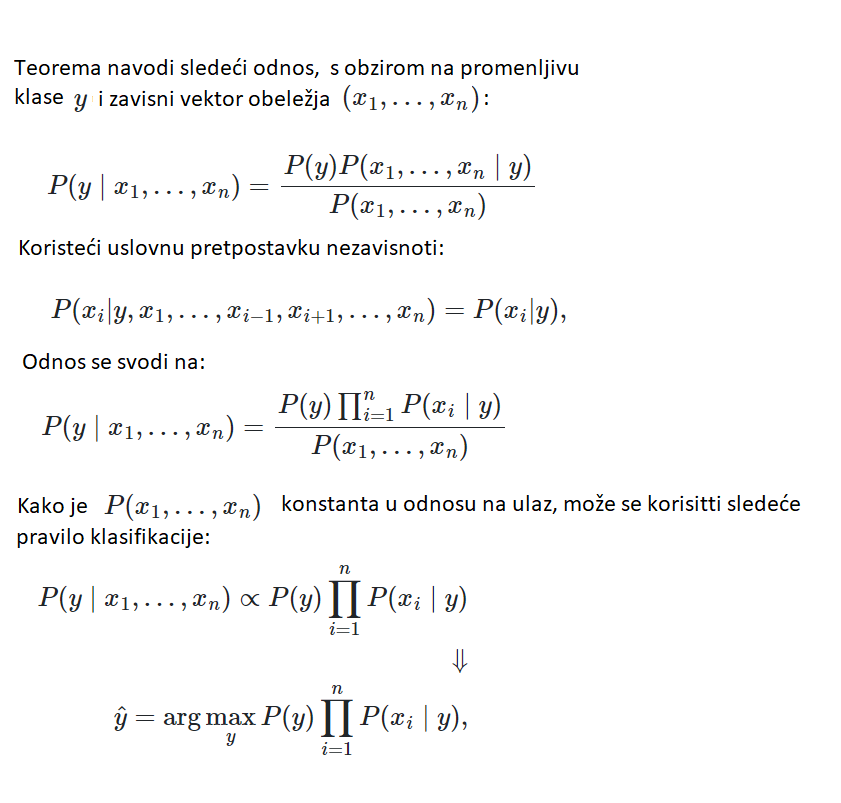

In [105]:
display(Image('slike/bajesova_teorema.png'))

In [106]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
#0.5525252525252526
scores = stratified_k_fold(classifier, df_train)
print(scores)
nb_acc = np.mean(scores, dtype=np.float64)
nb_std = np.std(scores, dtype=np.float64)
print(nb_acc)
print(nb_std)

[0.59090909 0.59090909 0.46969697 0.55555556 0.55555556]
0.5525252525252526
0.044329511631296344


Klasifikator daje lošije klasifikacione rezultate i glavna pretpostavka je da je razlog ovome promenljive koje nisu sasvim nezavisne. Iz ovog razloga, korišćena je PCA tehnika ekstrakcije feature-a, koja omogućava transformisanje skupova koreliranih promenljivih, poput karakteristika listova, u linearno nekorelirane, ortogonalne vektore (principal components). 

#####**Feature Extraction**

Algoritam PCA konstruiše novi skup svojstava na osnovu kombinacije starih. Matematički gledano, PCA izvodi linearnu transformaciju premeštajući originalni skup karakteristika u novi prostor sastavljen od glavnih komponenti (eng. principal components).

Kardinalnost skupa karakteristika, odnosno komponenti,u izlazu može biti manji od broja ulaznih karakteristika, ponekad sve informacije ulaznih karakteristika mogu biti sadržane u manjem broju vektora, pa se iz tog razloga PCA često koristi kao metoda redukcije dimenzionalnosti. 

Njegova primena u sklearn biblioteci zasniva se na dekompoziciji singularne vrednosti (eng. Singular Value Decomposition - SVD), metodi za izdvajanje  eigenvector-a, ortogonalnih vektora, pomoću faktorizacije matrice ulaznih karakteristika.


Tehnike redukcije dimenzionalnosti koriste se kako bi se klasifikacioni model trenirao na manjem broju feature-a i tako se poboljšala performantnost. Pored toga, ove tehnike mogu dovesti i do unapređenja tačnosti modela, rešavajući se redundantnih karakteristika dok zadržavaju karakteristike velike varijanse za koje postoji veća verovatnoća da će dati dobru podelu između klasa. 

PCA model biblioteke sklearn se inicijalizuje odabirom vrednosti parametara n_components i svd_solver. Vrednosti mle i full ovih parametara obezbeđuju da rezultat ove analize bude minimalni broj potrebnih izlaznih komponenti kako bi se održale iste informacije koje dolaze iz ulaznih karakteristika i  SVD se rešava u potpunosti.


In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle', svd_solver = 'full')
df_train_pca=pca.fit_transform(df_train)
print("Number of descriptors before PCA: " + '{:1.0f}'.format(df_train.shape[1]))
print("Number of descriptors after PCA: " + '{:1.0f}'.format(df_train_pca.shape[1]))

Number of descriptors before PCA: 192
Number of descriptors after PCA: 191


In [108]:
classifier = GaussianNB()
#0.9585858585858587
scores = stratified_k_fold(classifier, pd.DataFrame(df_train_pca))
print(scores)
nb_pca_acc = np.mean(scores, dtype=np.float64)
nb_pca_std = np.std(scores, dtype=np.float64)
print(nb_pca_acc)
print(nb_pca_std)


[0.94444444 0.94949495 0.96969697 0.98989899 0.93939394]
0.9585858585858587
0.01873458281918325


Obučavanjem Naive Bayes klasifikatora na ulaznim podacima koji su transformisani nakon PCA analize, rezultati su se značajno poboljšali, jer je sada pretpostavka o nezavisnosti karakteristika tačna.

In [109]:
models = pd.DataFrame({
    'Model': ['SGD Classifier','Random Forest Classifier','K Neighbors Classifier', 
              'SVM Classifier', 'SVM Paramater Tunning', 'Naive Bayes', 'Naive Bayes PCA'],

    'Score': [sgd_acc,
              rndf_acc,
              knn_acc, 
              svm_acc,
              grid_acc,
              nb_acc,
              nb_pca_acc],
    'Standard diviation': [sgd_std,
              rndf_std,
              knn_std, 
              svm_std,
              grid_std,
              nb_std,
              nb_pca_std]},

              )
models.sort_values(by='Score', ascending=True)

,Model,Score,Standard diviation
5,Naive Bayes,0.552525,0.044330
0,SGD Classifier,0.631313,0.065384
3,SVM Classifier,0.794949,0.024866
2,K Neighbors Classifier,0.858586,0.020202
4,SVM Paramater Tunning,0.947475,0.025273
6,Naive Bayes PCA,0.958586,0.018735
1,Random Forest Classifier,0.970707,0.009258


Klasifikatori sa najviše uspešnosti su Random Forest Classifier, Naive Bayes uz PCA i SVM sa podešenim parametrima.

####**MLP**

MLP (Multilayer perceptron) model još poznat feedforward nerural network ili deep feedforward network predstavlja matematički formalizam za aproksimaciju funkcije. Na primeru zadatka klasifikacije, klasifikator y=f∗(x) mapira input x u kategoriju (klasu) y. Ovaj model definiše mapiranje y=f(x;θ) i uči parametre θ kako bi se postigla najbolja aproksimacija funkcije f. 


Ovi modeli se nazivaju feedforward, jer informacija struji kroz funkciju koja se aproksimira od x, kroz posredne proračune koje se definišu za funkciju f i konačno do izlaza y. Ne postoje povratne veze u kojima se izlazi modela vraćaju nazad u model [7].

#####**Universal approximation theorem**
U matematičkoj teoriji veštačkih neuronskih mreža, teoreme o univerzalnoj aproksimaciji su rezultati [8] koji se tiču tipično aproksimacionih mogućnosti napredne arhitekture na prostoru kontinuiranih funkcija. Univerzalne teoreme aproksimacije podrazumevaju da neuronske mreže mogu predstavljati, odnosno aproksimirati, širok spektar funkcija kada im se daju odgovarajuće težine. 

Neuronske mreže se mogu shvatiti kao klasa funkcija koje se slažu hijerarhijski kako bi se dobila kompleksna nelinearna funkcija. Predstavljaju ideju više faza hijerarhijskog računanja prolaskom kroz slojeve linearnih funkcija između kojih se postavljaju nelinearne funkcije [9].

Neuronska mreža sastoji se iz više slojeva neurona, gde su neuroni svakog sloja povezani sa neuronima prethodnog sloja. Prvi sloj se naziva inuput sloj, poslednji output sloj, dok se ostali slojevi između ova dva nazivaju hidden. Mreža funkcioniše tako što vrednosti neurona jednog sloja, koje se još nazivaju aktivacije, utiču na aktivacije neurona sledećeg sloja. Srž ideje neuronskih mreža je obrada informacija kojom informacije jednog sloja neurona utiču na izračunavanje informacija koje nose neuroni narednog sloja. Izračunavanje vrednosti neurona narednog sloja mreže može se posmatrati kao izračunavanje funkcije koja za ulazne parametre dobija aktivacione vrednosti neurona prethodnog sloja i vrednosti težinskih faktora koji se dodeljuju vezama neurona dva sloja.




#####**Backpropagation algoritam**

Težinski faktori neurona su parametri koji se računaju prilikom treniranja neuronske mreže optimizacijom funkcije gubitka (loss function). Funkcija gubitka govori koliko je dobar rezultat koji je neuronska mreža dala. Imajući ovo u vidu, treniranje mreže predstavlja proces minimizacije vrednosti funkcije gubitka, koji zapravo predstavlja pronalazak vrednosti čijom primenom se vrednosti parametara menjanju tako da omogućavaju tačna predviđanja rezultata aproksimirane funkcije. Ova vrednost kojom treba podesiti vrednost parametara predstavlja negativan gradijent funkcije gubitka. Vrednost negativnog gradijenta funkcije gubitka računa se primenom algoritma backwards propagation – unazadne propagacije. 

In [110]:
#Neural Network Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax

print(df_train_copy.shape)
print(df_test_copy.shape)
print(labels_copy.shape)

(990, 192)
(594, 192)
(990,)


In [111]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(df_train_copy)

array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

Pored skaliranja podataka, kao i u slučaju obučavanja prethodnih modela, potrebno je kodirati kategoričke podatke sa kojima model radi, odnosno labele.

Postoji više načina za kodiranje:

* Celobrojno kodiranje - jedinstvena 
oznaka se preslikava u ceo broj (LabelEncoder).
* One Hot Encoding - svaka oznaka se preslikava u binarni vektor.
* Naučene reprezentacije

Korišćen je OneHotEncoder biblioteke sklearn.


In [112]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels_copy = pd.DataFrame(labels_copy)
labels_one_hot = ohe.fit_transform(labels_copy.values.reshape(-1, 1)).toarray()
print(labels_one_hot.shape)
print(labels_one_hot[0])

(990, 99)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


Kao i u slučaju obučavanja prethodnih modela, izvršena je stratifikovana podela na podatke za treniranje i validaciju, kao i za testiranje nakon završene faze treniranja i validacije.

U slučaju prethodnih modela vršile su se procene performansi modela tehnikom unakrsne validacije, što je u slučaju ovih modela izostavljeno.

In [113]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=42)
train_index, test_index = next(iter(sss.split(df_train_copy, labels_one_hot)))
X_train_nn, X_test_nn = df_train_copy.iloc[train_index,:], df_train_copy.iloc[test_index,:]
y_train_nn, y_test_nn = labels_one_hot[train_index], labels_one_hot[test_index]

# Ponovna stratifikovana podela nije izvodljiva 
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=42)
# train_index, val_index = next(iter(sss.split(X_train_nn, y_train_nn)))
# X_train_nn, X_val_nn = df_train_copy.iloc[train_index,:], df_train_copy.iloc[val_index,:]
# y_train_nn, y_val_nn = labels_one_hot[train_index], labels_one_hot[val_index]
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_nn, y_train_nn, test_size=0.10, random_state=42)
print("x_train dim: ",X_train_nn.shape)
print("x_test dim:   ",X_test_nn.shape)
print("x_val dim:   ",X_val_nn.shape)
print()

x_train dim:  (801, 192)
x_test dim:    (99, 192)
x_val dim:    (90, 192)



Aktivacione funkcije se koriste na kraju hidden layer-a i uvode nelinearnu složenost u model. Korišćena je RELU aktivaciona funkcija.

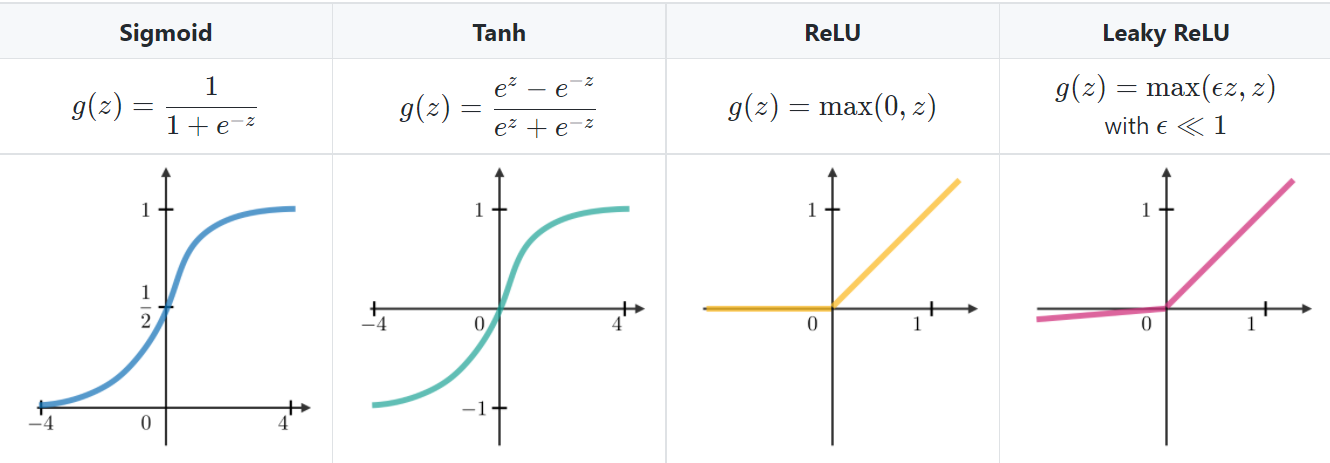

In [114]:
display(Image('slike/aktivacione_funkcije.png'))

Svi slojevi su Dense slojevi, potpuno povezani slojevi sa definisanim brojem neurona. Poslednji sloj za aktivacionu funkciju ima softmax funkciju. Ova funkcija pretvara vektor K realnih vrednosti u vektor K realnih vrednosti čija je suma 1. Drugim rečima, softmax na izlazu dodeljuje decimalnu verovatnoću za svaku od klasa multi-class problema i suma ovih decimalnih verovatnoća iznosi 1, tako da se za predviđenu klasu uzima klasa sa najvećom verovatnoćom.

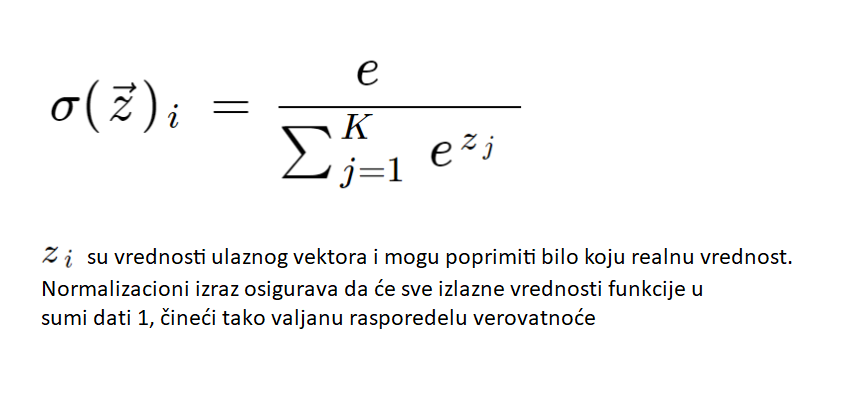

In [115]:
display(Image('slike/softmax.png'))

In [116]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax

model = Sequential()
model.add(Dense(256, input_dim=192, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1600, activation='relu'))
model.add(Dense(99, activation='softmax'))

Categorical Cross-Entropy loss se još naziva i Softmax loss i koristi se u slučajevima multi-class klasifikacije. U problemu sa C klasa formula je sledeća [10]:

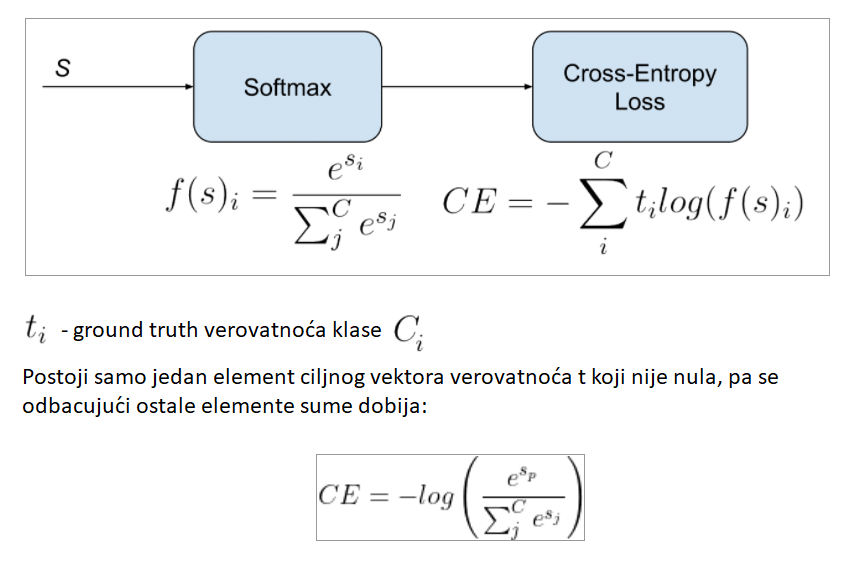

In [117]:
display(Image('slike/cross_entropy_loss.png'))

#####**Optimizacioni algoritam**

Pri kompajliranju modela, prosleđuju se parametri loss, optimizer i metrics, koji redom predstavljaju funkciju gubitka koja se koristi prilikom obučavanja modela, algoritam optimizacije koji se pritom koristi i metrike koje se prate.

Neki od algoritama optimizacije su:
* SGD (Stochastic Gradient Descent)
* RMSprop (Root Mean Square Propogation)
* Adam

Algoritam optimizacije određuje brzinu učenja modela, odnosno stopu učenja koja se primenjuje u svakom koraku ažuriranja modela. Adam algoritam kombinuje prednosti druga dva optimizatora:

* Algoritam prilagodljivog gradijenta (AdaGrad) - održava brzinu učenja po parametru koja poboljšava performanse kod problema sa retkim gradijentima.

* Root Mean Square Propogation (RMSProp) - takođe održava stope učenja po parametru koje su prilagođene na osnovu proseka nedavnih veličina gradijenata za težinu (npr. Koliko se brzo menja). 

Umesto da prilagođava stope učenja parametara na osnovu prosečnog prvog momenta (srednje vrednosti) kao u RMSProp-u, Adam takođe koristi prosek drugih momenata gradijenata (necentrirana varijansa).
Algoritam izračunava eksponencijalni pokretni prosek gradijenta i kvadratnog gradijenta, a parametri beta1 i beta2 kontrolišu stope propadanja ovih pokretnih proseka [11].

In [118]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Prilikom obučavanja modela, definiše se broj epoha, pri čemu epoha predstavlja prolazak preko celokupnog skupa trening podataka. Epoha se sastoji iz iteracija, gde broj iteracija zavisi od veličine batch-a (broj uzoraka po ažuriranju gradijenta). Nakon svake iteracije i prolaska kroz određeni broj podataka (određen veličinom batch-a), na osnovu sračunate funkcije gubitka se vrše podešavanja parametara i zatim uz pomoć validacionih podataka računa tačnost modela.


In [119]:
from keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='nn_model.hdf5',verbose=1,save_best_only=True)
history = model.fit(X_train_nn, y_train_nn, epochs=100,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[checkpointer])

Epoch 1/100
26/26 [==============================] - 2s 54ms/step - loss: 4.5872 - accuracy: 0.0224 - val_loss: 4.2756 - val_accuracy: 0.0222

Epoch 00001: val_loss improved from inf to 4.27558, saving model to nn_model.hdf5
Epoch 2/100
26/26 [==============================] - 1s 36ms/step - loss: 3.9300 - accuracy: 0.0604 - val_loss: 3.1231 - val_accuracy: 0.1111

Epoch 00002: val_loss improved from 4.27558 to 3.12313, saving model to nn_model.hdf5
Epoch 3/100
26/26 [==============================] - 1s 35ms/step - loss: 2.8856 - accuracy: 0.1470 - val_loss: 3.0782 - val_accuracy: 0.0667

Epoch 00003: val_loss improved from 3.12313 to 3.07816, saving model to nn_model.hdf5
Epoch 4/100
26/26 [==============================] - 1s 37ms/step - loss: 2.6058 - accuracy: 0.2255 - val_loss: 2.2241 - val_accuracy: 0.3222

Epoch 00004: val_loss improved from 3.07816 to 2.22411, saving model to nn_model.hdf5
Epoch 5/100
26/26 [==============================] - 1s 36ms/step - loss: 1.8969 - accur

Definisane su metode koje za prosleđen model i istoriju obučavanja modela ispisuju tačnost modela i grafike koji pokazuju kretanje vrednosti funkcije gubitka i tačnosti klasifikacije modela kroz epohe. Na osnovu ovih grafika analizirana je performansa modela i dalji koraci njegovog poboljšanja.

In [120]:
def print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, model):
  score=model.evaluate(X_train_nn,y_train_nn,verbose=1)              
  accuracy=100*score[1]                                       
  print('Test accuracy on train data is %.4f%%' % accuracy)

  score=model.evaluate(X_test_nn,y_test_nn,verbose=1)               
  accuracy=100*score[1]                                       
  print('Test accuracy on test data is %.4f%%' % accuracy)

In [121]:
import matplotlib.pyplot as plt
def print_and_plot_history(history):
  print('val_acc: ',max(history.history['val_accuracy']))
  print('val_loss: ',min(history.history['val_loss']))
  print('train_acc: ',max(history.history['accuracy']))
  print('train_loss: ',min(history.history['loss']))
  print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

  plt.semilogy(history.history['loss'])
  plt.semilogy(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


26/26 [==============================] - 0s 7ms/step - loss: 7.8195e-05 - accuracy: 1.0000
Test accuracy on train data is 100.0000%
4/4 [==============================] - 0s 7ms/step - loss: 0.3937 - accuracy: 0.8889
Test accuracy on test data is 88.8889%
val_acc:  0.8222222328186035
val_loss:  0.7214375138282776
train_acc:  1.0
train_loss:  7.990116864675656e-05
train/val loss ratio:  0.0001107527223290128


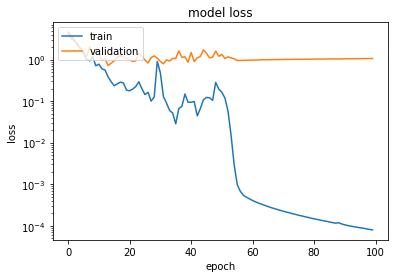

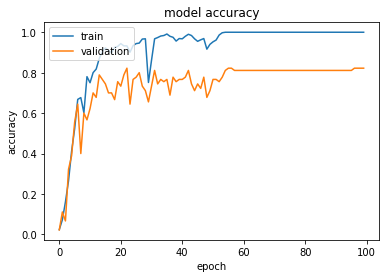

In [122]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, model)
print_and_plot_history(history)

Train loss nastavlja da opada dok validacioni stagnira, što može da ukaže na overfitting koji će dalje biti razmatran. Vrednosti tačnosti i gubitka fluktuiraju i pretpostavka je da se ovo dešava iz sledećih ili nekog od sledećih razloga: 

*   Model je previše veliki - zbog ovoga je teško naći lokalne minimume podešavanjem velikog broja parametara trenirajući nad malom količinom podataka. 
*   Premala vrednost parametra treniranja batch_size - može se desiti da pogrešno labelirani podaci dovedu do ažuriranja parametara modela tako da se udaljava od lokalnog minimuma, ovaj efekat je izražen u slučajevima ažuriranja parametara modela na malom delu podataka (batch_size ima premalu vrednost). Takođe, u dataset-u postoji 99 klasa, pa bi mali batch_size onemogućio da se u skupu podataka na osnovu kojih se podešavaju parametri modela nađe veći broj klasa.

U nastavku model je uprošćen i default-na vrednost batch_size-a 32 je promenjena na 192.





In [123]:
modelv2 = Sequential()
modelv2.add(Dense(256, input_dim=192, activation='relu'))
modelv2.add(Dense(512, activation='relu'))
modelv2.add(Dense(600, activation='relu'))
modelv2.add(Dense(99, activation='softmax'))

In [124]:
modelv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer=ModelCheckpoint(filepath='nn_modelv2.hdf5',verbose=1,save_best_only=True)
historyv2 = modelv2.fit(X_train_nn, y_train_nn, epochs=100, batch_size=192,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[checkpointer])

Epoch 1/100
5/5 [==============================] - 1s 121ms/step - loss: 4.5921 - accuracy: 0.0334 - val_loss: 4.5752 - val_accuracy: 0.1333

Epoch 00001: val_loss improved from inf to 4.57518, saving model to nn_modelv2.hdf5
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 4.5623 - accuracy: 0.2071 - val_loss: 4.5419 - val_accuracy: 0.1111

Epoch 00002: val_loss improved from 4.57518 to 4.54191, saving model to nn_modelv2.hdf5
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 4.5107 - accuracy: 0.2080 - val_loss: 4.4808 - val_accuracy: 0.1222

Epoch 00003: val_loss improved from 4.54191 to 4.48082, saving model to nn_modelv2.hdf5
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 4.4036 - accuracy: 0.2028 - val_loss: 4.3814 - val_accuracy: 0.0778

Epoch 00004: val_loss improved from 4.48082 to 4.38139, saving model to nn_modelv2.hdf5
Epoch 5/100
5/5 [==============================] - 0s 21ms/step - loss: 4.2193 - accura

26/26 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 1.0000
Test accuracy on train data is 100.0000%
4/4 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8788
Test accuracy on test data is 87.8788%
val_acc:  0.8999999761581421
val_loss:  0.37919121980667114
train_acc:  1.0
train_loss:  0.011210842058062553
train/val loss ratio:  0.02956514147078181


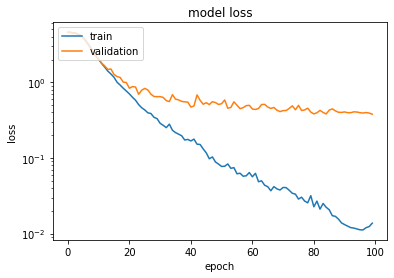

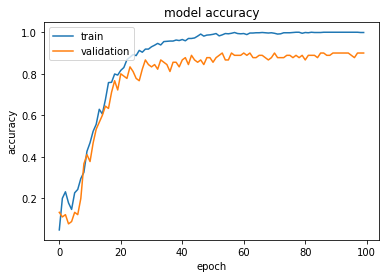

In [125]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, modelv2)
print_and_plot_history(historyv2)

Model se nakon izmena dosta bolje ponaša u fazi treniranja.

Kriva koja pokazuje promenu vrednosti funkcije gubitka na trening podacima je dosta strmija od krive koja pokazuje kretanje vrednosti ove funkcije na validacionim podacima, što može da ukazuje na to da naučeni parametri ne obezbeđuju dovoljno dobru generalizaciju i predikciju klasa za podatke na kojima model nije treniran. Ova pojava predstavlja overfitting, koji je u ovom slučaju moguć zbog obučavanja modela nad malim skupom podataka. 

Overfitting se može rešiti tako što se trenira više modela različite arhitekture, a zatim za krajnji rezultat predikcije uzima prosek ili klasa koja je predviđena najviše puta. Dropout predstavlja mehanizam regularizacije koji aproksimira treniranje modela u paraleli. Iz tog razloga, kako bi se rešio problem overfitting-a dodat je Dropout sloj. 

Dropout sloj obezbeđuje da se prilikom treniranja, sa određenom verovatnoćom, određeni izlazi sloja ignorišu, čime se postiže efekat šuma.


In [126]:
from keras.layers import Dropout

modelv3 = Sequential()
modelv3.add(Dense(256, input_dim=192, activation='relu'))
modelv3.add(Dropout(0.1))
modelv3.add(Dense(512, activation='relu'))
modelv3.add(Dropout(0.1))
modelv3.add(Dense(600, activation='relu'))
modelv3.add(Dense(99, activation='softmax'))


In [127]:
modelv3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
checkpointer=ModelCheckpoint(filepath='nn_modelv3.hdf5',verbose=1,save_best_only=True)
historyv3 = modelv3.fit(X_train_nn, y_train_nn, epochs=100, batch_size=192,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[checkpointer])

Epoch 1/100
5/5 [==============================] - 1s 137ms/step - loss: 4.5923 - accuracy: 0.0108 - val_loss: 4.5755 - val_accuracy: 0.0444

Epoch 00001: val_loss improved from inf to 4.57551, saving model to nn_modelv3.hdf5
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 4.5643 - accuracy: 0.0834 - val_loss: 4.5470 - val_accuracy: 0.0444

Epoch 00002: val_loss improved from 4.57551 to 4.54697, saving model to nn_modelv3.hdf5
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 4.5124 - accuracy: 0.1046 - val_loss: 4.4857 - val_accuracy: 0.0333

Epoch 00003: val_loss improved from 4.54697 to 4.48568, saving model to nn_modelv3.hdf5
Epoch 4/100
5/5 [==============================] - 0s 24ms/step - loss: 4.4246 - accuracy: 0.0873 - val_loss: 4.3825 - val_accuracy: 0.0667

Epoch 00004: val_loss improved from 4.48568 to 4.38254, saving model to nn_modelv3.hdf5
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 4.2606 - accura

26/26 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9975
Test accuracy on train data is 99.7503%
4/4 [==============================] - 0s 4ms/step - loss: 0.2817 - accuracy: 0.9091
Test accuracy on test data is 90.9091%
val_acc:  0.9444444179534912
val_loss:  0.19267819821834564
train_acc:  0.9975031018257141
train_loss:  0.03442761301994324
train/val loss ratio:  0.1786793385981811


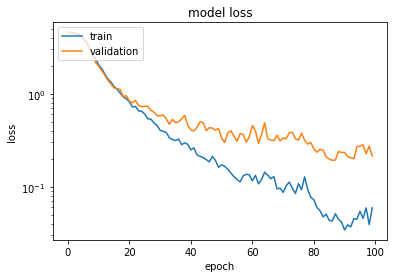

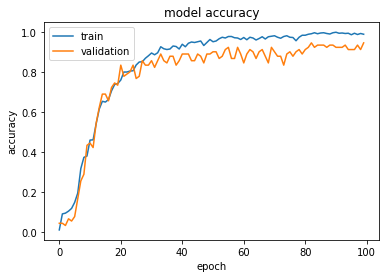

In [129]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, modelv3)
print_and_plot_history(historyv3)

Uspešnost klasifikacije kreiranih modela treba bolje estimirati tehnikama kao što je unakrsna validacija. Na test podacima se najbolje pokazao trećo model, sa podešenim batch_size-om, redukovanim brojem slojeva i dropout mehanizmom. 

###**Zaključak**

Zadatak klasifikacije biljke na osnovu lista rešen je obučavanjem šest modela mašinskog učenja (SGD, Random Forest, KNeighbors, SVM, Naive Bayes i MLP). Ovi modeli obučeni su nad ekstraktovanim feature-ima slika. Uspešnost klasifikacije i estimacija modela postignuta je stratifikovanom unakrsnom validacijom koja obezbeđuje posmatranje bias-a i varijanse modela. Model SVM-a unapređen je Grid Search tehnikom optimizacije hiperparametara, a Naive Bayes klasifikator PCA analizom za ekstrakciju feature-a. MLP modeli modifikovani su posmatrajući grafik funkcije gubitka i tačnosti modela kroz epohe treniranja. 

Kao najuspešniji klasifikatori pokazali su se Random Forest (97.88 ± 0.004), Naive Bayes nakon PCA analize (95.86 ±0.019)i SVM sa optimizovanim hiperparametrima (94.74 ±0.025). 

Modeli se dalje mogu unaprediti optimizacijom parametara (k u slučaju KNeighbors klasifikatora) ili se bolja uspešnost klasifikacije može postići kreiranjem ansambla modela različite arhitekture MLP-a. Na tačnost modela može pozitivno uticati treniranje nad većom količinom podataka, augmentacijom podataka. Dodatno, analizom matrice konfuzije mogu se uočiti klase koje modeli najčešće pogrešno klasifikuju (npr. ukoliko postoje dve vrste biljaka koje imaju sličan izgled listova i često se mešaju) i dodatno unaprediti postupak klasifikacije razvojem novih klasifikatora ili feature-a. 


###**Literatura**


[1] Silva, P.F.B. (2013). *Development of a System for
Automatic Plant Species Recognition* (Master's thesis, Faculty of Science of University Porto, Porto, Portugal). Retrieved from https://repositorio-aberto.up.pt/handle/10216/67734

[2] Mallah, C., Cope, J., & Orwell, J. (2013). Plant leaf classification using probabilistic integration of shape, texture and margin features. *Signal Processing, Pattern Recognition and Applications*, 5(1)

[3] scikit-learn. (n.d.). Visualizing cross-validation behavior in scikit-learn. https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#

[4] Singh, S. (2021, May 21). Understanding the Bias-Variance Tradeoff. Retrieved from https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

[5] Ćulibrk, D. (2012). *Otkrivanje znanja iz podataka: Odabrana poglavlja*. Fort Lauderdale, USA: CreateSpace Independent Publishing Platform. 

[6] scikit-learn. (n.d.). Naive Bayes. https://scikit-learn.org/stable/modules/naive_bayes.html

[7] Goodfellow, I. & Bengio Y. & CourvilleClark A. (2016).*Deep Learning*. An MIT Press book. https://doi.https://www.deeplearningbook.org/

[8] Hornik, K., Stinchcombe, M., & White, H. (1989). *Multilayer feedforward networks are universal approximators. Neural networks*, 2(5), 359-366.

[9] Stanford University School of Engineering. (2017, August 11). *Lecture 4|Introduction to Neural Networks* [Video]. https://www.youtube.com/watch?v=d14TUNcbn1k

[10] Gomez, R. (2018, May 23). *Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names*. Raúl Gómez blog. https://gombru.github.io/2018/05/23/cross_entropy_loss/

[11] Singh, S. (2021, May 21). Adam — latest trends in deep learning optimization. Retrieved from https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c